In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/kunal.jain001/miniconda3/envs/O/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['number', 'f', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [49]:
import os
import cv2
import mahotas as mh

In [50]:
DATA_DIR = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired'

In [51]:
z = 602
img = '000000_000000_000'+str(z)+'_000000.tif'

In [52]:
z_img = mh.imread(os.path.join(DATA_DIR,img))

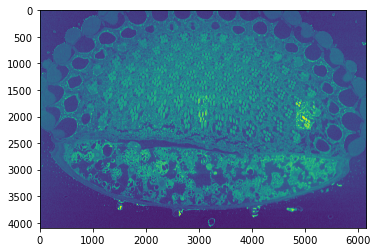

In [53]:
imshow(z_img)

In [54]:
z_img_cropped = z_img.copy()[1500:2000, 2500:4000]

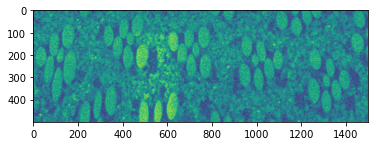

In [55]:
imshow(z_img_cropped)

In [61]:
a = cv2.imread(os.path.join(DATA_DIR,img))

In [62]:
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

In [63]:
a.dtype

dtype('uint8')

In [64]:
a_cropped = a.copy()[1500:2000, 2500:4000]

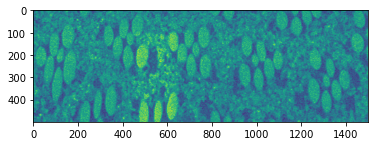

In [65]:
imshow(a_cropped)

In [66]:
image_eq = cv2.equalizeHist(a_cropped)

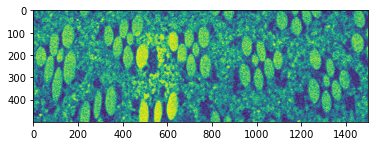

In [67]:
imshow(image_eq)

<Figure size 432x288 with 0 Axes>

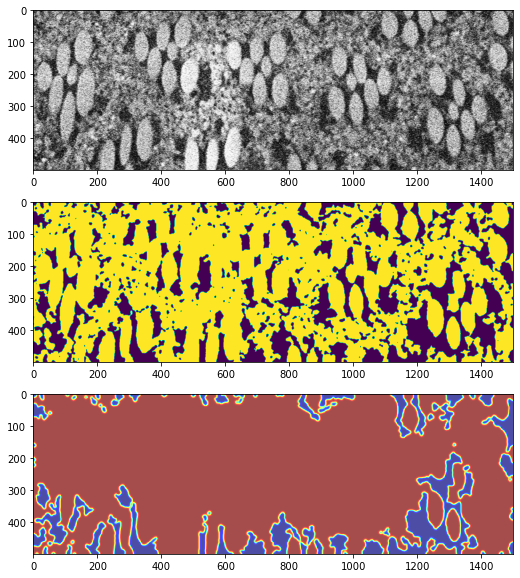

In [68]:
plt.figure()
f, plot = plt.subplots(3, figsize=(10, 10))
# enhance contrast apply gaussian filter
b = image_eq.copy()
b = mh.stretch_rgb(b)
b = mh.gaussian_filter(b, sigma=3)

# filter by value
b[b<100] = 0 # Could be played around with later

# label regions
labeled, number  = mh.label(b)

# filter based on labeled region size
sizes = mh.labeled.labeled_size(labeled)
too_small = np.where(sizes < 1000)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)

# create binary mask - foreground and background
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1
plot[1].imshow(binary_mask)

# close holes in binary mask
binary_mask_closed_holes = mh.morph.close_holes(binary_mask)

# close region in binary mask
binary_mask_closed = mh.morph.close(binary_mask_closed_holes)

# dilate and erode to fill further holes
for i in range(4):
    binary_mask_closed = mh.morph.dilate(binary_mask_closed)
for i in range(4):
    binary_mask_closed = mh.morph.erode(binary_mask_closed)

# apply gaussian filter on close region binary mask
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

# show images
plot[0].imshow(image_eq, cmap='gray')
plot[2].imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)

In [27]:
# enhance contrast using histogram equalization
# https://levelup.gitconnected.com/introduction-to-histogram-equalization-for-digital-image-enhancement-420696db9e43

In [10]:
histogram_array = np.bincount(z_img_cropped.flatten(), minlength=256)

In [11]:
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

In [12]:
chistogram_array = np.cumsum(histogram_array)

In [13]:
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

In [15]:
img_list = list(z_img_cropped.flatten())

In [16]:
eq_img_list = [transform_map[p] for p in img_list]

In [17]:
eq_img_array = np.reshape(np.asarray(eq_img_list), z_img_cropped.shape)

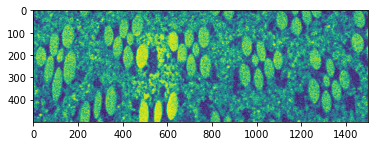

In [18]:
imshow(eq_img_array)

<Figure size 432x288 with 0 Axes>

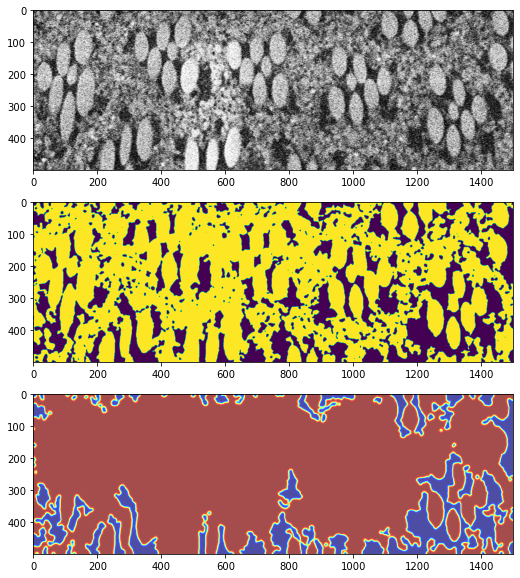

In [25]:
plt.figure()
f, plot = plt.subplots(3, figsize=(10, 10))
# enhance contrast apply gaussian filter
b = eq_img_array.copy()
b = mh.stretch_rgb(b)
b = mh.gaussian_filter(b, sigma=3)

# filter by value
b[b<100] = 0 # Could be played around with later

# label regions
labeled, number  = mh.label(b)

# filter based on labeled region size
sizes = mh.labeled.labeled_size(labeled)
too_small = np.where(sizes < 1000)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)

# create binary mask - foreground and background
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1
plot[1].imshow(binary_mask)

# close holes in binary mask
binary_mask_closed_holes = mh.morph.close_holes(binary_mask)

# close region in binary mask
binary_mask_closed = mh.morph.close(binary_mask_closed_holes)

# dilate and erode to fill further holes
for i in range(4):
    binary_mask_closed = mh.morph.dilate(binary_mask_closed)
for i in range(4):
    binary_mask_closed = mh.morph.erode(binary_mask_closed)

# apply gaussian filter on close region binary mask
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

# show images
plot[0].imshow(eq_img_array, cmap='gray')
plot[2].imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)